In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datasets:
Download tmdb_5000_credits.csv and tmdb_5000_movies.csv files from https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

Download ratings_small.csv from https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=ratings_small.csv

In [5]:
df1 = pd.read_csv("tmdb_5000_credits.csv")
df2 = pd.read_csv("tmdb_5000_movies.csv")

In [6]:
df1.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [8]:
df1 = df1.drop('title', axis = 1)
df1.head(1)

,movie_id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
df1.columns = ['id', 'cast', 'crew']
df2 = df2.merge(df1, on='id')
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [10]:
vote_avg = df2['vote_average'].mean()
vote_avg

6.092171559442016

In [11]:
min_counts = df2['vote_count'].quantile(0.9)
min_counts      #min counts to decide best movies

1838.4000000000015

In [12]:
q_movies = df2.copy().loc[df2['vote_count']>=min_counts]
q_movies.shape

(481, 22)

In [13]:
def ratings(x, m=min_counts, c=vote_avg):
    a = x['vote_count']
    b = x['vote_average']
    return (a/(a+m) * b) + (m/(m+a) * c)

In [14]:
q_movies['score'] = q_movies.apply(ratings, axis = 1)
q_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669


In [15]:
q_movies = q_movies.sort_values('score', ascending = False)
q_movies[['title', 'score']].head(5)

,title,score
1881,The Shawshank Redemption,8.059258
662,Fight Club,7.939256
65,The Dark Knight,7.920020
3232,Pulp Fiction,7.904645
96,Inception,7.863239


Text(0.5, 1.0, 'Most popular movies')

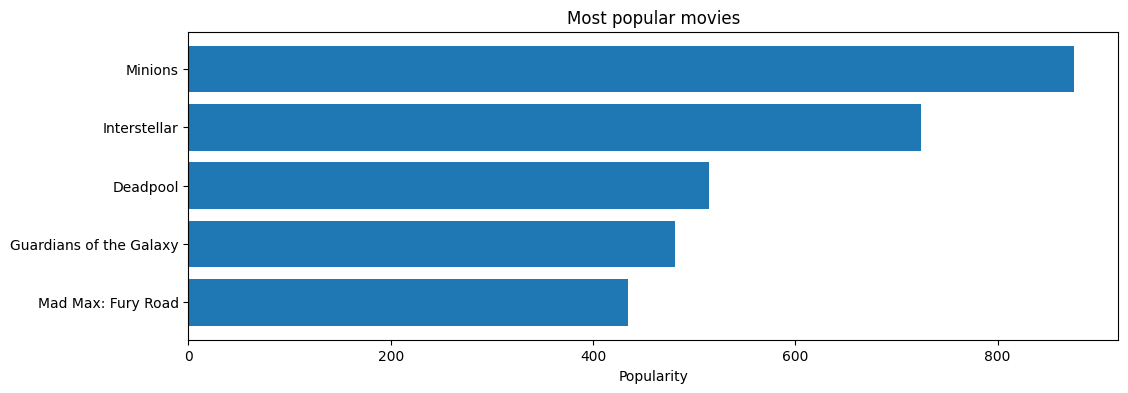

In [16]:
pop = df2.sort_values('popularity', ascending = False)
plt.figure(figsize = (12,4))
plt.barh(pop['title'].head(5), pop['popularity'].head(5), align='center')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title('Most popular movies')

# Content Based Recommendation

In [17]:
#Plot Based
df2['overview'] = df2['overview'].fillna('')
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [18]:
# Using Term Frequency-Inverse Document Frequency to convert to word vector
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [20]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [21]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()
indices.head(10)

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
Spider-Man 3                                5
Tangled                                     6
Avengers: Age of Ultron                     7
Harry Potter and the Half-Blood Prince      8
Batman v Superman: Dawn of Justice          9
dtype: int64

In [22]:
def get_recommendations(title, cosine = cosine_similarity):
    idx = indices[title]
    sim_scores = list(enumerate(cosine[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [23]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

In [24]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [25]:
#Credits, genre recommendation
from ast import literal_eval    #Converting stringifies lists

In [26]:
df2.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
def convert(obj):
    l = []
    for i in literal_eval(obj):
        l.append(i['name'])
    return l

In [28]:
df2['genres'] = df2['genres'].apply(convert)

In [29]:
df2['keywords'] = df2['keywords'].apply(convert)

In [30]:
df2['cast'].head(1)

0    [{"cast_id": 242, "character": "Jake Sully", "...
Name: cast, dtype: object

In [31]:
def convert_cast(obj):
    l = []
    count = 0
    for i in literal_eval(obj):
        if count!=3:
            l.append(i['name'])
            count+=1
        else:
            break
    return l

In [32]:
df2['cast'] = df2['cast'].apply(convert_cast)

In [33]:
df2['cast'].head(1)

0    [Sam Worthington, Zoe Saldana, Sigourney Weaver]
Name: cast, dtype: object

In [34]:
def convert_crew(obj):
    l = []
    for i in literal_eval(obj):
        if(i['job'] == 'Director'):
            l.append(i['name'])
            break
    return l

In [35]:
df2['crew'] = df2['crew'].apply(convert_crew)

In [36]:
df2['crew'].head(1)

0    [James Cameron]
Name: crew, dtype: object

In [37]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [38]:
#Sam Worthington -> samworthington
def transform_col(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [39]:
features = ['cast', 'crew', 'genres', 'keywords']
for feature in features:
    df2[feature] = df2[feature].apply(transform_col)
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[action, adventure, fantasy, sciencefiction]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron]


In [40]:
df2['soup'] = df2['keywords'] + df2['cast'] + df2['crew'] + df2['genres']

In [41]:
df2['soup']

0       [cultureclash, future, spacewar, spacecolony, ...
1       [ocean, drugabuse, exoticisland, eastindiatrad...
2       [spy, basedonnovel, secretagent, sequel, mi6, ...
3       [dccomics, crimefighter, terrorist, secretiden...
4       [basedonnovel, mars, medallion, spacetravel, p...
                              ...                        
4798    [unitedstates–mexicobarrier, legs, arms, paper...
4799    [edwardburns, kerrybishé, marshadietlein, edwa...
4800    [date, loveatfirstsight, narration, investigat...
4801    [danielhenney, elizacoupe, billpaxton, danielh...
4802    [obsession, camcorder, crush, dreamgirl, drewb...
Name: soup, Length: 4803, dtype: object

In [42]:
df2.shape

(4803, 23)

In [43]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,soup
0,237000000,"[action, adventure, fantasy, sciencefiction]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar, spacecolony, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]",[jamescameron],"[cultureclash, future, spacewar, spacecolony, ..."


In [44]:
def try_join(l):
    try:
        return ' '.join(map(str, l))
    except TypeError:
        return np.nan

df2['newsoup'] = [try_join(l) for l in df2['soup']]
df2['newsoup']

0       cultureclash future spacewar spacecolony socie...
1       ocean drugabuse exoticisland eastindiatradingc...
2       spy basedonnovel secretagent sequel mi6 britis...
3       dccomics crimefighter terrorist secretidentity...
4       basedonnovel mars medallion spacetravel prince...
                              ...                        
4798    unitedstates–mexicobarrier legs arms paperknif...
4799    edwardburns kerrybishé marshadietlein edwardbu...
4800    date loveatfirstsight narration investigation ...
4801        danielhenney elizacoupe billpaxton danielhsia
4802    obsession camcorder crush dreamgirl drewbarrym...
Name: newsoup, Length: 4803, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df2['newsoup'])
count_matrix.shape

(4803, 17832)

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
cosine2 = cosine_similarity(count_matrix, count_matrix)
df2 = df2.reset_index()
indices = pd.Series(df2.index, index = df2['title'])

In [47]:
get_recommendations('The Dark Knight Rises', cosine2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
3332                 Harry Brown
3819                    Defendor
4099                 Harsh Times
210               Batman & Robin
3359                 In Too Deep
1503                      Takers
1986                      Faster
Name: title, dtype: object

In [48]:
get_recommendations('The Avengers', cosine2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
85     Captain America: The Winter Soldier
79                              Iron Man 2
182                                Ant-Man
169     Captain America: The First Avenger
68                                Iron Man
126                   Thor: The Dark World
31                              Iron Man 3
94                 Guardians of the Galaxy
Name: title, dtype: object

# Collaborative filtering

In [97]:
from surprise import accuracy, Reader, Dataset, SVD    #used for recommender systems
from surprise.model_selection import cross_validate, train_test_split

In [98]:
ratings = pd.read_csv("ratings_small.csv")
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [118]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
train, test = train_test_split(data, test_size = 0.3)

In [119]:
svd = SVD()
svd.fit(train)

In [122]:
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 10, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8899  0.8901  0.8863  0.8928  0.9022  0.9105  0.8811  0.8861  0.8887  0.8975  0.8925  0.0082  
MAE (testset)     0.6858  0.6822  0.6827  0.6857  0.6979  0.6990  0.6797  0.6851  0.6804  0.6867  0.6865  0.0064  
Fit time          1.69    1.65    1.70    1.70    1.64    1.65    1.64    1.66    1.61    1.64    1.66    0.03    
Test time         0.08    0.36    0.09    0.09    0.09    0.08    0.09    0.09    0.09    0.08    0.12    0.08    


{'test_rmse': array([0.88986126, 0.89008108, 0.88631447, 0.89282428, 0.90218369,
        0.91051191, 0.88109851, 0.88612938, 0.88868135, 0.89747706]),
 'test_mae': array([0.68577011, 0.68222047, 0.68267278, 0.68574743, 0.69790925,
        0.69904097, 0.67966521, 0.68509933, 0.68035794, 0.68668528]),
 'fit_time': (1.6914405822753906,
  1.6517043113708496,
  1.699582815170288,
  1.7017419338226318,
  1.6382381916046143,
  1.6462748050689697,
  1.6417498588562012,
  1.659766435623169,
  1.60933518409729,
  1.6371736526489258),
 'test_time': (0.07854723930358887,
  0.36473584175109863,
  0.09420251846313477,
  0.08912229537963867,
  0.08802151679992676,
  0.07852935791015625,
  0.09417319297790527,
  0.09473586082458496,
  0.09368610382080078,
  0.07857036590576172)}

In [123]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [124]:
svd.predict(1, 16, 3)

Prediction(uid=1, iid=16, r_ui=3, est=2.9311873078141586, details={'was_impossible': False})

In [125]:
ratings[ratings['movieId'] == 16]['rating'].mean()

3.9488636363636362

In [126]:
svd.predict(2, 79, 3)

Prediction(uid=2, iid=79, r_ui=3, est=2.926744235243331, details={'was_impossible': False})

In [127]:
predictions = svd.test(test)

In [128]:
accuracy.rmse(predictions)

RMSE: 0.6672


0.6671840092870979